# Face Detection (dlib 얼굴 검출 라이브러리 활용)

In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths

In [2]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

## Test1 (CNN 기반 VS HoG 기반)
* 얼굴인식 : 모두 완벽하지만 CNN이 좀더 세밀
* 속도 : 13.7s , 254ms로 차이가 HoG가 훨씬 빠르다.

I found 5 face(s) in this photograph.


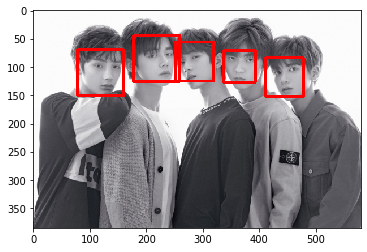

In [3]:
img = cv2.imread("../datas/face2.jpg")

# CNN으로 찾음(feature가 정교하게 하기때문에 오래걸림 strong classifier)
face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

I found 5 face(s) in this photograph.


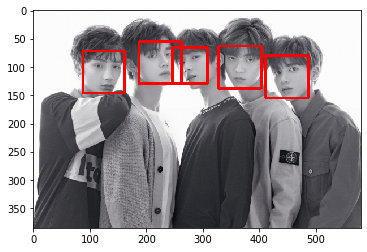

In [4]:
img = cv2.imread("../datas/face2.jpg")

# HoG 호그로 찾는것(히스토그램으로 찾기 때문에 정교하게 찾을수 없다.)
face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

# Test2

I found 0 face(s) in this photograph.


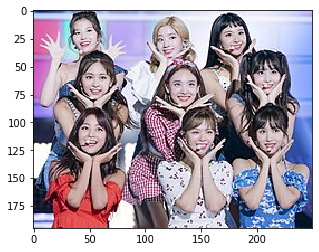

In [5]:
img = cv2.imread("../datas/group05.jpg")

# CNN으로 찾음(feature가 정교하게 하기때문에 오래걸림 strong classifier)
face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

I found 3 face(s) in this photograph.


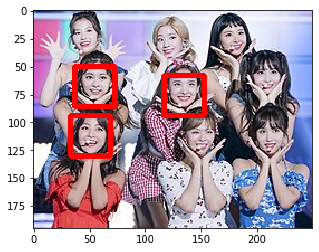

In [6]:
img = cv2.imread("../datas/group05.jpg")

# HoG 호그로 찾는것(히스토그램으로 찾기 때문에 정교하게 찾을수 없다.)
face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [3]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("../datas/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [35]:
frame = cv2.imread("../datas/face2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

Number of faces detected: 5
[(413, 85) (485, 157)]
[(93, 77) (165, 149)]
[(333, 69) (405, 141)]
[(189, 53) (261, 125)]
[(245, 61) (317, 133)]


In [45]:
print(" 첫번째 검출된 얼굴의 좌표 : ", rects[0])
print()
shape = predictor(gray, rects[0])
print(shape)
print()
shape = face_utils.shape_to_np(shape)
print(" - 점의 개수 :",len(shape))
print()
print(shape)

 첫번째 검출된 얼굴의 좌표 :  [(413, 85) (485, 157)]


 - 점의 개수 : 68

[[427 115]
 [427 121]
 [428 128]
 [431 134]
 [434 141]
 [438 147]
 [442 154]
 [447 158]
 [454 160]
 [463 158]
 [471 153]
 [479 147]
 [486 140]
 [491 133]
 [492 124]
 [492 114]
 [491 104]
 [424 105]
 [426 102]
 [429 100]
 [433 100]
 [437 101]
 [445  98]
 [451  94]
 [459  92]
 [467  93]
 [473  97]
 [442 108]
 [441 113]
 [440 118]
 [440 123]
 [438 129]
 [441 130]
 [443 131]
 [447 129]
 [450 128]
 [429 113]
 [431 109]
 [435 108]
 [439 111]
 [435 112]
 [432 113]
 [453 107]
 [457 103]
 [461 102]
 [466 104]
 [462 106]
 [458 107]
 [439 142]
 [440 138]
 [442 136]
 [445 137]
 [447 135]
 [453 136]
 [459 138]
 [455 143]
 [450 145]
 [447 146]
 [444 146]
 [442 145]
 [441 142]
 [443 140]
 [446 140]
 [448 139]
 [457 139]
 [449 140]
 [446 141]
 [443 141]]


In [10]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

Detection 0: Left: 413 Top: 85 Right: 485 Bottom: 157
Detection 1: Left: 93 Top: 77 Right: 165 Bottom: 149
Detection 2: Left: 333 Top: 69 Right: 405 Bottom: 141
Detection 3: Left: 189 Top: 53 Right: 261 Bottom: 125
Detection 4: Left: 245 Top: 61 Right: 317 Bottom: 133


In [38]:
i = 0
eye_x = 0
eye_y = 0
for k, d in enumerate(rects):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
    shape = predictor(gray, d)
    shape = face_utils.shape_to_np(shape)
    if(i >= 42 & i <= 48):
        eye_x += x
        eye_y += y
    else:
        continue
    i+=1
eye_x = int(eye_x / 7)
eye_y = int(eye_y / 7)
print(eye_x, eye_y)
cv2.circle(frame, (eye_x, eye_y), 2, (0, 0, 255), -1)

Detection 0: Left: 413 Top: 85 Right: 485 Bottom: 157
Detection 1: Left: 93 Top: 77 Right: 165 Bottom: 149
Detection 2: Left: 333 Top: 69 Right: 405 Bottom: 141
Detection 3: Left: 189 Top: 53 Right: 261 Bottom: 125
Detection 4: Left: 245 Top: 61 Right: 317 Bottom: 133
196 87


array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [251, 251, 251]],

       [[252, 252, 252],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [251, 251, 251]],

       [[252, 252, 252],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[113, 107, 108],
        [ 87,  81,  82],
        [ 90,  84,  85],
        ...,
        [ 97,  92,  93],
        [103,  97,  98],
        [116, 110, 111]],

       [[ 91,  85,  86],
        [ 98,  92,  93],
        [ 73,  67,  68],
        ...,
        [ 97,  92,  93],
        [103,  97,  98],
        [128, 122, 123]],

       [[ 90,  84,  85],
        [ 94,  88,  89],
        [ 67,  62,  63],
        ...,
        [100,  95,  96],
        [104,  99, 100],
        [157, 152, 153]]

In [39]:
eye1 = np.mean(shape[36:42], axis=0)
eyer = np.mean(shape[42:48], axis=0)

cv2.circle(frame, (int(eye1[0]), int(eye1[1])), 2, (0,0,255), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2, (0,0,255), -1)

array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [251, 251, 251]],

       [[252, 252, 252],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [251, 251, 251]],

       [[252, 252, 252],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[113, 107, 108],
        [ 87,  81,  82],
        [ 90,  84,  85],
        ...,
        [ 97,  92,  93],
        [103,  97,  98],
        [116, 110, 111]],

       [[ 91,  85,  86],
        [ 98,  92,  93],
        [ 73,  67,  68],
        ...,
        [ 97,  92,  93],
        [103,  97,  98],
        [128, 122, 123]],

       [[ 90,  84,  85],
        [ 94,  88,  89],
        [ 67,  62,  63],
        ...,
        [100,  95,  96],
        [104,  99, 100],
        [157, 152, 153]]

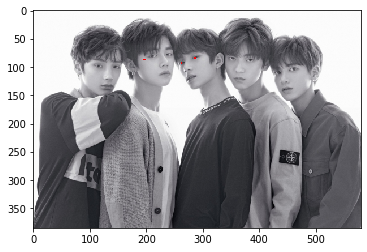

In [40]:
cv2.imwrite("out.jpg", frame)
imshow("", frame)

In [54]:
img = face_recognition.load_image_file("../datas/face.jpg")
face_encoding = face_recognition.face_encodings(img)
#print(face_encoding)
print(face_encoding[0].shape)

(235, 215, 3)
(128,)


## 예제 test.jpg를 통해 a.jpg, b.jpg, c.jpg 중 가장 정확한 이미지 찾기

In [17]:
files = os.listdir("../datas/detect")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
    name, ext = os.path.splitext(filename)
    print(name, ext)
    if ext == '.jpg':
        known_face_names.append(name)
        pathname = os.path.join("../datas/detect", filename)
        img = face_recognition.load_image_file(pathname)
        # 0번째 사람만
        print(face_recognition.face_encodings(img))
        face_encoding = face_recognition.face_encodings(img)[0]
        known_face_encodings.append(face_encoding) 

chootest .jpg
[array([-1.02209628e-01,  4.19035666e-02,  2.92517245e-04, -5.52058257e-02,
       -1.41312122e-01, -7.13672861e-02, -1.55480355e-02, -1.11379258e-01,
        1.30478665e-01, -1.26603350e-01,  2.15022206e-01, -1.07079826e-01,
       -2.26194829e-01, -1.30282640e-02, -4.38578650e-02,  1.90863550e-01,
       -1.93068802e-01, -1.11342750e-01, -9.87547785e-02,  2.28700545e-02,
        3.58239599e-02,  3.32222506e-02,  1.62791200e-02,  4.51755896e-02,
       -1.44441858e-01, -3.33615094e-01, -6.09929338e-02, -1.01165965e-01,
        5.57547994e-03, -3.42324749e-02, -4.28545326e-02,  8.70806128e-02,
       -1.76867872e-01, -1.01632327e-01,  5.60794435e-02,  7.93683901e-02,
       -4.54208143e-02, -6.33122772e-02,  1.89235806e-01,  2.95307357e-02,
       -2.73788422e-01, -4.38437983e-03,  5.38252965e-02,  2.69406050e-01,
        1.05881236e-01,  3.20555083e-02,  4.43042181e-02, -1.43739849e-01,
        1.14555433e-01, -1.88967571e-01, -5.06294705e-03,  5.78886755e-02,
        8.

[array([-1.18744537e-01, -2.99869012e-03, -3.65380570e-02, -9.82718021e-02,
       -1.65901184e-01, -4.98705544e-02, -6.06935434e-02, -3.54485735e-02,
        1.24160081e-01, -1.47779614e-01,  2.29881078e-01, -9.07955319e-02,
       -1.83934987e-01, -4.58329208e-02, -9.50630754e-02,  2.21234530e-01,
       -2.08994433e-01, -1.54002905e-01, -4.81720939e-02,  9.44571942e-03,
        2.21358202e-02, -5.13195479e-03, -5.30715287e-02,  6.21304773e-02,
       -1.65638641e-01, -3.53699356e-01, -7.52990395e-02, -1.10256627e-01,
       -2.66185291e-02, -3.52759883e-02, -5.33303432e-03,  1.27843380e-01,
       -1.33669123e-01, -4.54314202e-02,  7.66729489e-02,  1.00116834e-01,
       -1.30033605e-02, -5.40803187e-02,  1.79037720e-01,  2.56267339e-02,
       -2.65201002e-01, -1.45923011e-02,  9.97993574e-02,  2.96735972e-01,
        1.32407948e-01,  7.83300586e-03,  3.05831283e-02, -5.93758263e-02,
        1.07276484e-01, -2.25304410e-01, -7.26991519e-03,  1.00319460e-01,
        9.61115435e-02, 

In [6]:
print(files)

['chootest.jpg', 'daebak.jpg', 'gwtest.jpg', 'gwtest02.jpg', 'jam.jpg', 'natest.jpg', 'natest02.jpg', 'will.jpg']


In [7]:
print(known_face_names)
print(known_face_encodings[0])# 첫번째 이미지에 대한 정보
print(known_face_encodings[1])# 두번째 이미지에 대한 정보

['chootest', 'daebak', 'gwtest', 'gwtest02', 'jam', 'natest', 'natest02', 'will']
[array([-1.02209628e-01,  4.19035666e-02,  2.92517245e-04, -5.52058257e-02,
       -1.41312122e-01, -7.13672861e-02, -1.55480355e-02, -1.11379258e-01,
        1.30478665e-01, -1.26603350e-01,  2.15022206e-01, -1.07079826e-01,
       -2.26194829e-01, -1.30282640e-02, -4.38578650e-02,  1.90863550e-01,
       -1.93068802e-01, -1.11342750e-01, -9.87547785e-02,  2.28700545e-02,
        3.58239599e-02,  3.32222506e-02,  1.62791200e-02,  4.51755896e-02,
       -1.44441858e-01, -3.33615094e-01, -6.09929338e-02, -1.01165965e-01,
        5.57547994e-03, -3.42324749e-02, -4.28545326e-02,  8.70806128e-02,
       -1.76867872e-01, -1.01632327e-01,  5.60794435e-02,  7.93683901e-02,
       -4.54208143e-02, -6.33122772e-02,  1.89235806e-01,  2.95307357e-02,
       -2.73788422e-01, -4.38437983e-03,  5.38252965e-02,  2.69406050e-01,
        1.05881236e-01,  3.20555083e-02,  4.43042181e-02, -1.43739849e-01,
        1.1455543

In [18]:
test = face_recognition.load_image_file("../datas/detection/naeun/na01.jpg")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:    
    # test와 image들간의 거리들을 추출한다. 그중에서 최소값을 통해 검출
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)  

    name = "Unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
print(name)              

[0.46787003 0.52288095 0.51432579 0.51105439 0.46856709 0.26021876
 0.50484593]
natest02


In [19]:
imagePaths = list(paths.list_images("../datas/detection"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    # 확장자 이름을 제외(?)
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        

ben   -   ../datas/detection\ben\ben01.jpg
ben   -   ../datas/detection\ben\ben02.jpg
ben   -   ../datas/detection\ben\ben03.jpg
ben   -   ../datas/detection\ben\ben04.jpg
ben   -   ../datas/detection\ben\ben05.jpg
ben   -   ../datas/detection\ben\ben06.jpg
ben   -   ../datas/detection\ben\ben07.jpg
ben   -   ../datas/detection\ben\ben08.jpg
ben   -   ../datas/detection\ben\ben09.jpg
ben   -   ../datas/detection\ben\ben10.jpg
gunwho   -   ../datas/detection\gunwho\gw01.jpg
gunwho   -   ../datas/detection\gunwho\gw02.jpg
gunwho   -   ../datas/detection\gunwho\gw03.jpg
gunwho   -   ../datas/detection\gunwho\gw04.jpg
gunwho   -   ../datas/detection\gunwho\gw05.jpg
gunwho   -   ../datas/detection\gunwho\gw06.jpg
gunwho   -   ../datas/detection\gunwho\gw07.jpg
gunwho   -   ../datas/detection\gunwho\gw08.jpg
gunwho   -   ../datas/detection\gunwho\gw09.jpg
gunwho   -   ../datas/detection\gunwho\gw10.jpg
naeun   -   ../datas/detection\naeun\na01.jpg
naeun   -   ../datas/detection\naeun\na02.jp

In [138]:
print(os.path.sep)
# known/trump/images.jpg면 trump를 가져오게 된다.
# dictionary 가져오는 방법
print(data["encodings"])
print(data["names"])
print(data["names"][0])

\
[array([-0.09982464,  0.04627921,  0.00668407, -0.04552734, -0.13515076,
       -0.05975179, -0.00689493, -0.12214582,  0.13743901, -0.13259873,
        0.21083999, -0.08508806, -0.2272678 , -0.00607432, -0.03369394,
        0.19034091, -0.18136883, -0.1159291 , -0.09168687,  0.02214536,
        0.02178593,  0.06500871,  0.01094622,  0.04349641, -0.14112519,
       -0.3289023 , -0.0760342 , -0.10520965, -0.00100879, -0.02060331,
       -0.03599347,  0.08482184, -0.169716  , -0.11120582,  0.06893373,
        0.08173799, -0.05162629, -0.07336718,  0.1893422 ,  0.0264235 ,
       -0.26665047,  0.00933708,  0.06952295,  0.27317446,  0.07917687,
        0.00939118,  0.04377102, -0.13733183,  0.10577766, -0.17943209,
       -0.00515449,  0.04184568,  0.10644527,  0.05642196,  0.02533679,
       -0.11886075,  0.0874387 ,  0.14302437, -0.2210619 ,  0.00663987,
        0.11218687, -0.06638656, -0.00839311, -0.06273201,  0.22826494,
        0.03979576, -0.0954551 , -0.12574594,  0.10885855, -0

In [139]:
print(boxes)

[(38, 158, 90, 106)]


[0.43019399 0.45934065 0.35818897 0.         0.45392382 0.44613253
 0.55322825 0.54979366 0.55750964 0.45183883 0.38771632 0.49914351
 0.47289225 0.55979175 0.55750964 0.48703578 0.44019374 0.38558162
 0.33092448 0.41708083 0.50033375 0.45813873 0.42355336 0.41362014
 0.35206073 0.42978401 0.51809987 0.42639355 0.45135081 0.51687961
 0.40345841 0.56877298 0.51687961 0.56331175 0.435486   0.53010455
 0.42580615 0.76228493 0.73339029 0.74630532 0.75133844 0.72684703
 0.76828573 0.75274851 0.74750017 0.74015143 0.57521282 0.61966134
 0.58449711 0.60791432 0.63081965 0.5919344  0.76090543 0.72997725
 0.76923435 0.71038346]
[True, True, True, True, True, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[0, 1

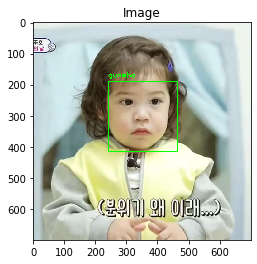

In [158]:
data = pickle.loads(open("known.bin", "rb").read())
 
# test data 불러오기
image = cv2.imread("../datas/detection/gwtest02.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    # 비교해서 매치가 되는지 안되는지까지 확인
    matches = face_recognition.compare_faces(data["encodings"], encoding, tolerance=0.5)    
    distances = face_recognition.face_distance(data["encodings"], encoding)
    print(distances)
    
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        print(matches)
        print(matchIdxs)
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    print(name)
    print(counts)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    # 15를 뺀거는 이미지 보다 조금더 위에다 추출하려고
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [128]:
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    print(matches)

    matchIdxs = [i for (i,b) in enumerate(matches) if b]
    print(matchIdxs)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [104]:
encoding = encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchIdxs = [i for (i,b) in enumerate(matches) if b]
print(matchIdxs)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [97]:
a = {}
a["hello"] # 키가 정의 되지 않으면 에러발생
a.get("hello") # 키가 정의되어 있지 않아도 에러발생하지 않음 빈문자열 return
a.get("hello", 0) # 정의 되지 않았으면 0으로 가져옴
a["hello"] =10 # hello가 있으면 10으로 update하고 hello가 없었으면 생성하라

IndexError: list index out of range

In [93]:
feature = np.array(data["encodings"])
print(feature.shape)

(9, 128)


In [107]:
import pandas as pd

c = pd.factorize(data["names"])
print(c)
label =c[0]
print(label)

(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64), array(['../datas/detection', 'ben', 'gunwho', 'naeun'], dtype=object))
[0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3]


###  송중기

In [130]:
print(imagePaths)

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 

['../datas/detection\\chootest.jpg', '../datas/detection\\daebak.jpg', '../datas/detection\\gwtest.jpg', '../datas/detection\\gwtest02.jpg', '../datas/detection\\jam.jpg', '../datas/detection\\natest.jpg', '../datas/detection\\natest02.jpg', '../datas/detection\\will.jpg', '../datas/detection\\ben\\ben01.jpg', '../datas/detection\\ben\\ben02.jpg', '../datas/detection\\ben\\ben03.jpg', '../datas/detection\\ben\\ben04.jpg', '../datas/detection\\ben\\ben05.jpg', '../datas/detection\\ben\\ben06.jpg', '../datas/detection\\ben\\ben07.jpg', '../datas/detection\\ben\\ben08.jpg', '../datas/detection\\ben\\ben09.jpg', '../datas/detection\\ben\\ben10.jpg', '../datas/detection\\gunwho\\gw01.jpg', '../datas/detection\\gunwho\\gw02.jpg', '../datas/detection\\gunwho\\gw03.jpg', '../datas/detection\\gunwho\\gw04.jpg', '../datas/detection\\gunwho\\gw05.jpg', '../datas/detection\\gunwho\\gw06.jpg', '../datas/detection\\gunwho\\gw07.jpg', '../datas/detection\\gunwho\\gw08.jpg', '../datas/detection\\gunwh

In [116]:
imagePaths = list(paths.list_images("../datas/known"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        

../datas/known   -   ../datas/known\lena.jpg
../datas/known   -   ../datas/known\songtest.jpg
obama   -   ../datas/known\obama\download (1).jpg
obama   -   ../datas/known\obama\download (2).jpg
obama   -   ../datas/known\obama\download (3).jpg
obama   -   ../datas/known\obama\download.jpg
obama   -   ../datas/known\obama\images (1).jpg
obama   -   ../datas/known\obama\images (2).jpg
obama   -   ../datas/known\obama\images (3).jpg
obama   -   ../datas/known\obama\images (4).jpg
obama   -   ../datas/known\obama\images.jpg
song   -   ../datas/known\song\download (4).jpg
song   -   ../datas/known\song\download.jpg
song   -   ../datas/known\song\images (1).jpg
song   -   ../datas/known\song\images (2).jpg
song   -   ../datas/known\song\images (3).jpg
song   -   ../datas/known\song\images.jpg
trump   -   ../datas/known\trump\download (1).jpg
trump   -   ../datas/known\trump\download.jpg
trump   -   ../datas/known\trump\images (1).jpg
trump   -   ../datas/known\trump\images.jpg


[True, True, True, True, True, True, False, False, False, True, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]
[False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False]


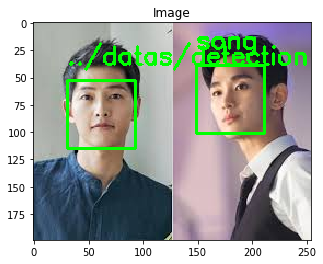

In [148]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("../datas/known/songtest.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    print(matches)
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [118]:
encoding = encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchIdxs = [i for (i,b) in enumerate(matches) if b]
print(matchIdxs)

[False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]
[1, 12, 13, 14, 15, 16, 17]
